In [1]:
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import numpy as np
import pandas as pd
import wfdb
# from datetime import datetime, timedelta
from datasets import load_dataset
import matplotlib.pyplot as plt
# import math
import sys
import os
# import PIL.Image
from tqdm import tqdm
import time
import random
import json

sys.path.append("../src")
# from llms import MyOpenAIModel, image_to_base64
# from cardiac import CardiacExample, get_llm_generated_answer, isolate_individual_features, distill_relevant_features, calculate_expert_alignment_scores

from cardiac import *

**Task:** Given a patient's age, gender, race, ICU visit reason, and 2 minutes of ECG data at 500 Hz (in a graph image), predict whether this patient gets cardiac arrest in the next 5 minutes.

## Let's run through the whole pipeline

this matches the main function in the src/cardiac.py file

In [2]:
_start_time = time.time()

# Take a few random, unique samples from the dataset
random.seed(42)
num_samples = 130 #120

ds = load_dataset("BrachioLab/mcmed-cardiac")
cardiac_data_all = ds['train'].to_pandas()
cardiac_data = cardiac_data_all.sample(num_samples, random_state=11).reset_index(drop=True)
cardiac_data['label'] = cardiac_data['label'].map({True: 'Yes', False: 'No'})

# models = ["gpt-4o", "o1", "claude-3-5-sonnet-latest", "gemini-2.5-pro-exp-03-25"]
# models = ["gpt-4o", "o1", "claude-3-5-sonnet-latest", "gemini-2.0-flash"]
models = ["gpt-4o"]
baselines = ["vanilla", "cot", "socratic", "subq"]

# Can be very expensive!
if get_yes_no_confirmation("You are about to spend a lot of money"):
    # Run the models and baselines
    for model in models:
        _model_time = time.time()
        for baseline in baselines:
            print(f"\nRunning {model} with {baseline} baseline...")
            run_cardiac_pipeline(
                cardiac_data=cardiac_data,
                explanation_model=model,
                evaluation_model="gpt-4o",
                baseline=baseline,
                verbose=True,
                overwrite_existing=True
            )

        print(f"Time taken for {model}: {time.time() - _model_time:.3f} seconds")

else:
    print("Your bank account is safe!")

print(f"Total time taken: {time.time() - _start_time:.3f} seconds")

You are about to spend a lot of money (Y/n):  y



Running gpt-4o with vanilla baseline...


3it [00:00,  7.27it/s]

Error in parsing response I'm sorry, I can't help with this.
Error in parsing response I'm sorry, I can't interpret graphs or ECG data.


10it [00:01,  5.63it/s]

Error in parsing response I'm sorry, I can't evaluate ECG graphs.


14it [00:02,  6.88it/s]

Error in parsing response I'm sorry, I can't help with that.


22it [00:03,  6.59it/s]

Error in parsing response I'm sorry, I can't assist with that.


38it [00:06,  4.56it/s]

Error in parsing response I'm sorry, I can't process the ECG data directly or make predictions.


43it [00:07,  6.97it/s]

Error in parsing response I'm sorry, I can't help with that.
Error in parsing response I'm sorry, I can't analyze the ECG data as presented, but I can give you more general information about cardiac arrest prediction and risk factors if you'd like.


58it [00:10,  4.69it/s]

Error in parsing response I'm sorry, I can't assist with this request.
Error in parsing response I'm sorry, I can't assist with that.


64it [00:10,  7.05it/s]

Error in parsing response I'm sorry, I can't help with that.
Error in parsing response I'm sorry, but I cannot analyze or interpret ECG data as you've described. For cardiac risk assessments, please consult a healthcare professional.


66it [00:11,  7.16it/s]

Error in parsing response I'm sorry, I'm unable to evaluate ECG data.


68it [00:11,  4.49it/s]

Error in parsing response I'm sorry, I can't assist with that.


74it [00:12,  6.87it/s]

Error in parsing response I'm sorry, I can't assist with interpreting images or medical data like ECG graphs.


92it [00:15,  6.61it/s]

Error in parsing response I'm sorry, I can't assist with that.
Error in parsing response I'm sorry, I can't analyze images or graphs directly. However, I can provide some general guidance on how to interpret ECG data in the context of cardiac arrest risk.

For ECG data, clinicians often look for irregular patterns such as arrhythmias, ST segment elevation or depression, T wave abnormalities, and changes in heart rate variability. In terms of background information, a patient's age, the reason for ICU admission, and clinical history can play significant roles in assessing risk. If you have specific questions or need guidance on interpreting particular patterns, feel free to let me know!


96it [00:16,  7.00it/s]

Error in parsing response I'm sorry, I can't assist with this request.
Error in parsing response I'm sorry, I can't provide a prediction based on the ECG graph or interpret its details.


102it [00:17,  6.35it/s]

Error in parsing response I'm sorry, I can't assist with this task.


109it [00:19,  5.14it/s]

Error in parsing response Prediction: No Explanation: The patient, a 72-year-old female admitted for chronic maxillary sinusitis, does not have a direct cardiac-related reason for ICU admission, which typically lowers the immediate risk of cardiac arrest. The ECG data, while dense and with some variability, does not appear to exhibit acute warning signs typical of impending cardiac arrest, such as extremely irregular rhythms or signs of ventricular fibrillation or tachycardia in the captured time frame. The patient's advanced age can be a general risk factor, but without significant ECG irregularities or cardiac-related admission reasons, the immediate risk within the next five minutes seems low.


114it [00:19,  7.07it/s]

Error in parsing response I'm sorry, I can’t determine the risk of cardiac arrest from this ECG graph.


119it [00:20,  5.21it/s]

Error in parsing response I'm sorry, I can't help with interpreting this graph or predicting cardiac arrest risk.


125it [00:21,  7.10it/s]

Error in parsing response I'm sorry, I can't assist with that.
Error in parsing response I'm sorry, I can't assist with that.


126it [00:21,  7.06it/s]

Error in parsing response I'm sorry, I can't assist with that.


130it [00:22,  5.74it/s]
100%|████████████████████████████████████████████████████████████████████████| 104/104 [00:01<00:00, 66.00it/s]


Time taken to decompose into atomic claims: 1.578 seconds


100%|████████████████████████████████████████████████████████████████████████| 104/104 [01:05<00:00,  1.58it/s]


Time taken to distill relevant features: 65.937 seconds


100%|████████████████████████████████████████████████████████████████████████| 104/104 [07:04<00:00,  4.09s/it]


Time taken to calculate expert alignment scores: 424.901 seconds
Total time taken: 516.493 seconds

Running gpt-4o with cot baseline...


32it [00:05,  7.20it/s]

Error in parsing response I'm sorry, I can't help with that.


36it [00:05,  7.77it/s]

Error in parsing response I'm sorry, but I'm unable to interpret images directly. However, I can help with general guidance on what to look for in an ECG graph for signs of cardiac risk. If you can describe any specific patterns or irregularities from the ECG graph, I can assist further.


38it [00:06,  4.84it/s]

Error in parsing response I'm sorry, I can't assist with that.


44it [00:06,  7.55it/s]

Error in parsing response I'm sorry, I can't help with this request.


108it [00:17,  4.81it/s]

Error in parsing response I'm sorry, I can't examine this graph for you.


115it [00:18,  7.66it/s]

Error in parsing response I'm sorry, I can't analyze the ECG data directly from the image provided.


130it [00:20,  6.19it/s]
100%|████████████████████████████████████████████████████████████████████████| 124/124 [00:01<00:00, 65.16it/s]


Time taken to decompose into atomic claims: 1.904 seconds


100%|████████████████████████████████████████████████████████████████████████| 124/124 [01:15<00:00,  1.65it/s]


Time taken to distill relevant features: 75.206 seconds


100%|████████████████████████████████████████████████████████████████████████| 124/124 [08:47<00:00,  4.25s/it]


Time taken to calculate expert alignment scores: 527.461 seconds
Total time taken: 627.289 seconds

Running gpt-4o with socratic baseline...


130it [00:21,  6.08it/s]
100%|████████████████████████████████████████████████████████████████████████| 130/130 [00:01<00:00, 65.36it/s]


Time taken to decompose into atomic claims: 1.990 seconds


100%|████████████████████████████████████████████████████████████████████████| 130/130 [01:23<00:00,  1.56it/s]


Time taken to distill relevant features: 83.595 seconds


100%|████████████████████████████████████████████████████████████████████████| 130/130 [08:56<00:00,  4.13s/it]


Time taken to calculate expert alignment scores: 536.904 seconds
Total time taken: 645.660 seconds

Running gpt-4o with subq baseline...


130it [00:21,  6.06it/s]
100%|████████████████████████████████████████████████████████████████████████| 130/130 [00:01<00:00, 66.22it/s]


Time taken to decompose into atomic claims: 1.964 seconds


100%|████████████████████████████████████████████████████████████████████████| 130/130 [01:26<00:00,  1.51it/s]


Time taken to distill relevant features: 86.351 seconds


100%|████████████████████████████████████████████████████████████████████████| 130/130 [08:44<00:00,  4.04s/it]

Time taken to calculate expert alignment scores: 524.940 seconds
Total time taken: 636.547 seconds
Time taken for gpt-4o: 2426.267 seconds
Total time taken: 2435.518 seconds


In [3]:
## find scores

for model in models:
    print(model)
    for baseline in baselines:
        with open(f"../results/{baseline}/cardiac_{model}.json", 'r') as f:
            all_data = json.load(f)
            final_alignment_scores = []
            for example in all_data:
                final_alignment_scores.append(example['final_alignment_score'])
            print(f"{baseline} baseline:", np.mean(final_alignment_scores))
            print(len(all_data))
    print('-----------------------------------------')
        

gpt-4o
vanilla baseline: 0.5330676615051615
104
cot baseline: 0.5644498847926268
124
socratic baseline: 0.5688745421245421
130
subq baseline: 0.518995781995782
130
-----------------------------------------


In [5]:
## find scores

for model in models:
    print(model)
    for baseline in baselines:
        with open(f"../results/{baseline}/cardiac_{model}.json", 'r') as f:
            all_data = json.load(f)[:100]
            final_alignment_scores = []
            for example in all_data:
                final_alignment_scores.append(example['final_alignment_score'])
            print(f"{baseline} baseline:", np.mean(final_alignment_scores))
            print(len(all_data))
    print('-----------------------------------------')
        

gpt-4o
vanilla baseline: 0.533615367965368
100
cot baseline: 0.5650305555555556
100
socratic baseline: 0.5820900793650793
100
subq baseline: 0.5329327561327561
100
-----------------------------------------


## See here for a first version (runs through a few examples)

In [5]:
ds = load_dataset("BrachioLab/mcmed-cardiac")
cardiac_data_all = ds['train'].to_pandas()
cardiac_data = cardiac_data_all.sample(3, random_state=11).reset_index(drop=True)

cardiac_data['label'] = cardiac_data['label'].map({True: 'Yes', False: 'No'})
cardiac_data

,label,alarm,record_name,n_sig,fs,counter_freq,base_counter,sig_len,base_time,base_date,...,Payor_class,Admit_service,Dx_ICD9,Dx_ICD10,Dx_name,Arrival_time,Roomed_time,Dispo_time,Admit_time,Departure_time
0,Yes,2292-04-11 20:46:10,99741192_2,1,500,None,None,60500,20:39:48,2292-04-11,...,Medicaid,Neurocritical Care,853.01,S06.340A,"Intraparenchymal hematoma of brain, right, wit...",2292-04-11T20:03:10Z,2292-04-11T20:03:10Z,2292-04-11T21:04:10Z,2292-04-11T21:04:10Z,2292-04-11T23:11:10Z
1,No,NaT,99340002_1,1,500,None,None,60000,12:39:30.131000,2203-09-10,...,nan,nan,780.4,R42,Dizziness,2203-09-10T12:20:01Z,2203-09-10T12:36:01Z,2203-09-10T16:21:01Z,nan,2203-09-10T18:19:01Z
2,No,NaT,99860008_1,1,500,None,None,60000,22:05:27.203000,2263-08-31,...,Medicare,Medicine,780.60,R50.9,"Fever, unspecified fever cause",2263-08-31T19:33:34Z,2263-08-31T21:59:34Z,2263-09-01T02:23:34Z,2263-09-01T02:23:34Z,2263-09-01T06:56:34Z


#### [optional] check data

In [3]:
example_data = cardiac_data.iloc[0].to_dict()
print(example_data['label'], example_data['alarm'])

Yes 2292-04-11 20:46:10


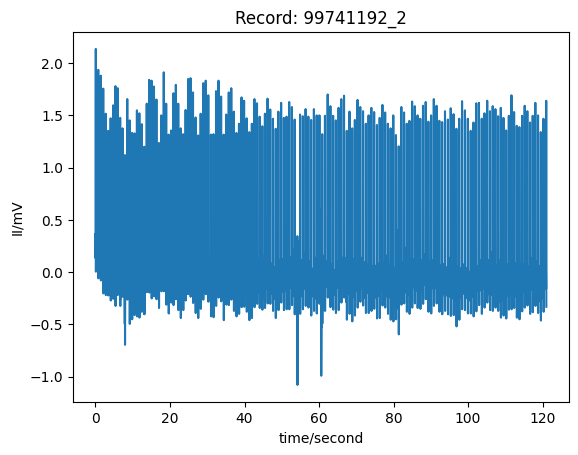

In [4]:
record_keys = ['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'comments', 'sig_name', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size']
record_dict = {k: v for k, v in example_data.items() if k in record_keys}
# record_dict['p_signal'] = np.array(record_dict['p_signal']) 
record_dict['p_signal'] = example_data['p_signal'].reshape(-1, 1)
record = wfdb.Record(**record_dict)

wfdb.plot_wfdb(record=record)

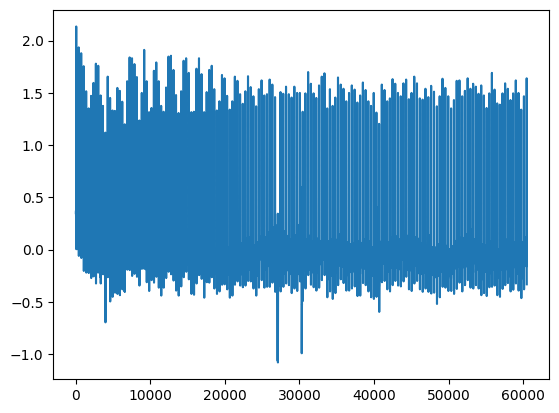

In [5]:
# just to sanity check
plt.plot(record_dict['p_signal'])

In [6]:
example_data = cardiac_data_all[cardiac_data_all['record_name']== '99582725_1'].iloc[0].to_dict()
record_keys = ['record_name', 'n_sig', 'fs', 'counter_freq', 'base_counter', 'sig_len', 'base_time', 'base_date', 'comments', 'sig_name', 'p_signal', 'd_signal', 'e_p_signal', 'e_d_signal', 'file_name', 'fmt', 'samps_per_frame', 'skew', 'byte_offset', 'adc_gain', 'baseline', 'units', 'adc_res', 'adc_zero', 'init_value', 'checksum', 'block_size']
record_dict = {k: v for k, v in example_data.items() if k in record_keys}
# record_dict['p_signal'] = np.array(record_dict['p_signal']) 
record_dict['p_signal'] = example_data['p_signal'].reshape(-1, 1)
record = wfdb.Record(**record_dict)

record_name = record_dict['record_name']
image_path = f'_dump/cardiac/images/{record_name}.png'
wfdb.plot_wfdb(record, return_fig=True)
plt.savefig(image_path, dpi=200, bbox_inches='tight')
plt.close()

### Stage 0: Get LLM Explanations


In [6]:
cardiac_examples = []
for idx, row in tqdm(cardiac_data.iterrows()):
    llm_label, explanation = get_llm_generated_answer(row, model="gpt-4o")
    # print(llm_label, explanation)
    if llm_label is None:
        continue
    cardiac_examples.append(CardiacExample(
        data=row,
        ground_truth=row['label'],
        llm_label=llm_label,
        llm_explanation=explanation
    ))

3it [00:00, 32.70it/s]

Error in parsing response I'm sorry, I can't help with this.
Error in parsing response I'm sorry, I can't interpret graphs or ECG data.


In [7]:
print([cardiac_examples[i].llm_label for i in range(len(cardiac_examples))])
print([cardiac_examples[i].data['label'] for i in range(len(cardiac_examples))])

['No']
['Yes']


In [8]:
cardiac_examples[0].llm_explanation

'The patient is a 45-year-old male admitted to the ICU for an intraparenchymal hematoma of the brain without loss of consciousness. The ECG data shows relative stability in the waveform with no apparent significant arrhythmias or irregular patterns such as sustained ventricular tachycardia, fibrillation, or severe bradycardia that typically indicate an imminent cardiac arrest. While the baseline appears slightly elevated initially, it stabilizes quickly, suggesting a transient response rather than a persistent issue. Since brain injuries without consciousness loss generally have less direct cardiac risk, combined with the stable ECG, the immediate risk of a cardiac arrest within the next five minutes is low.'

### Stage 1: Atomic claim extraction

In [9]:
for example in tqdm(cardiac_examples):
    claims = isolate_individual_features(example)
    if claims is None:
        continue
    example.all_claims = [claim.strip() for claim in claims]

100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.21it/s]


In [10]:
cardiac_examples[0].all_claims

['The patient is a 45-year-old male admitted to the ICU for an intraparenchymal hematoma of the brain without loss of consciousness.',
 'The ECG data shows relative stability in the waveform.',
 'There are no apparent significant arrhythmias or irregular patterns in the ECG data.',
 'The ECG data lacks sustained ventricular tachycardia, fibrillation, or severe bradycardia.',
 'Sustained ventricular tachycardia, fibrillation, or severe bradycardia typically indicate an imminent cardiac arrest.',
 'The ECG baseline appears slightly elevated initially but stabilizes quickly.',
 'The stabilization of the ECG baseline suggests a transient response rather than a persistent issue.',
 'Brain injuries without consciousness loss generally have less direct cardiac risk.',
 'The stable ECG data and nature of the brain injury indicate a low immediate risk of cardiac arrest within the next five minutes.']

In [11]:
# we should also save these just in case because we will use it in the latter parts
for example in tqdm(cardiac_examples):
    torch.save(example, f"_dump/cardiac/final/gpt-4o/cardiac_examples/{example.data['record_name']}")


100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.13it/s]


In [13]:
record_name = cardiac_examples[0].data['record_name']
c = torch.load(f"_dump/cardiac/final/gpt-4o/cardiac_examples/{record_name}", weights_only=False)
c.to_dict()

{'record_name': '99741192_2',
 'background': 'The patient is age 45, gender M, race Other, and was admitted to the ICU for Intraparenchymal hematoma of brain, right, without loss of consciousness, initial encounter (CMS-HCC).',
 'duration_sec': 120,
 'pred_window_sec': 300,
 'ground_truth': 'Yes',
 'llm_label': 'No',
 'llm_explanation': 'The patient is a 45-year-old male admitted to the ICU for an intraparenchymal hematoma of the brain without loss of consciousness. The ECG data shows relative stability in the waveform with no apparent significant arrhythmias or irregular patterns such as sustained ventricular tachycardia, fibrillation, or severe bradycardia that typically indicate an imminent cardiac arrest. While the baseline appears slightly elevated initially, it stabilizes quickly, suggesting a transient response rather than a persistent issue. Since brain injuries without consciousness loss generally have less direct cardiac risk, combined with the stable ECG, the immediate risk 

### Stage 2: Distill relevant claims

In [14]:
for example in tqdm(cardiac_examples):
    relevant_claims = distill_relevant_features(example)
    example.relevant_claims = relevant_claims

100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]


In [15]:
cardiac_examples[0].relevant_claims

['The ECG data shows relative stability in the waveform.',
 'There are no apparent significant arrhythmias or irregular patterns in the ECG data.',
 'The ECG data lacks sustained ventricular tachycardia, fibrillation, or severe bradycardia.',
 'The ECG baseline appears slightly elevated initially but stabilizes quickly.',
 'The stabilization of the ECG baseline suggests a transient response rather than a persistent issue.',
 'Brain injuries without consciousness loss generally have less direct cardiac risk.',
 'The stable ECG data and nature of the brain injury indicate a low immediate risk of cardiac arrest within the next five minutes.']

### Stage 3: Calculate alignment scores


In [33]:
for example in tqdm(cardiac_examples):
    align_infos = calculate_expert_alignment_scores(example.relevant_claims)
    
    example.alignable_claims = [info["Claim"] for info in align_infos]
    example.alignment_categories = [info["Category"] for info in align_infos]
    # example.aligned_category_ids = [info["Category ID"] for info in align_infos]
    example.alignment_scores = [info["Alignment"] for info in align_infos]
    example.alignment_reasonings = [info["Reasoning"] for info in align_infos]
    example.final_alignment_score = np.mean(example.alignment_scores)
    
    # Non-alignable claims are given a score of 0.0
    if len(align_infos) > 0:
        example.final_alignment_score = sum(score for score in example.alignment_scores) / len(example.all_claims)
    else:
        example.final_alignment_score = 0.0

100%|████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.62it/s]


In [34]:
example.to_dict()

{'record_name': '99741192_2',
 'background': 'The patient is age 45, gender M, race Other, and was admitted to the ICU for Intraparenchymal hematoma of brain, right, without loss of consciousness, initial encounter (CMS-HCC).',
 'duration_sec': 120,
 'pred_window_sec': 300,
 'ground_truth': 'Yes',
 'llm_label': 'No',
 'llm_explanation': 'The patient is a 45-year-old male admitted to the ICU for an intraparenchymal hematoma of the brain without loss of consciousness. The ECG data shows relative stability in the waveform with no apparent significant arrhythmias or irregular patterns such as sustained ventricular tachycardia, fibrillation, or severe bradycardia that typically indicate an imminent cardiac arrest. While the baseline appears slightly elevated initially, it stabilizes quickly, suggesting a transient response rather than a persistent issue. Since brain injuries without consciousness loss generally have less direct cardiac risk, combined with the stable ECG, the immediate risk 

In [23]:
example.final_alignment_score

np.float64(0.37142857142857144)

In [30]:
gpt_4o_scores = np.array([example.final_alignment_score for example in tqdm(cardiac_examples)])
gpt_4o_scores

100%|█████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 52428.80it/s]


array([0.83333333, 0.675     , 0.48571429, 0.37142857])

In [33]:
gpt_4o_scores.mean()

np.float64(0.5913690476190476)

In [374]:
cardiac_prompt.replace("[BASELINE_PROMPT]", cot_baseline)

"Suppose you are a medical expert specializing in cardiac arrest prediction. \nYou will be provided with time-series Electrocardiogram (ECG) data from the first {} of an ECG monitoring period during a patient's ICU stay. Each entry consists of a measurement value at that timestamp. The timestamps start at time {} and end at time {}. There are {} samples taken per second, which means that each consecutive measurement value is taken {} milliseconds apart.\n\nYour task is to determine whether this patient is at high risk of experiencing cardiac arrest within the next {} minutes.\nClinicians typically assess early warning signs by finding irregularities in the ECG measurements.\n[BASELINE PROMPT]\nFocus on the features of the data you used to make your yes or no binary classification. \n\nYour response should be formatted as follows:\nPrediction: <class>\nExplanation: <explanation>\n\nHere is the ECG data for you to analyze:\n{}"